In [1]:
import pandas as pd

data=pd.read_csv("insurance.csv")
# Preview the dataset
print(data.head())


   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [2]:
# Check basic info about the dataset
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Inspect unique values in categorical columns
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['region'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB
None
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000

In [3]:
# Fill missing numerical values with the mean
data.fillna(data.mean(), inplace=True)

In [4]:
# One-hot encoding for 'region' and 'sex'
data = pd.get_dummies(data, columns=['sex', 'region'], drop_first=True)

# Convert 'smoker' to binary (Yes -> 1, No -> 0)
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age', 'bmi', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'charges']])


In [6]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('insuranceclaim', axis=1)
y = data['insuranceclaim']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print(classification_report(y_test, y_pred))


[[ 94  13]
 [ 10 151]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       107
           1       0.92      0.94      0.93       161

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



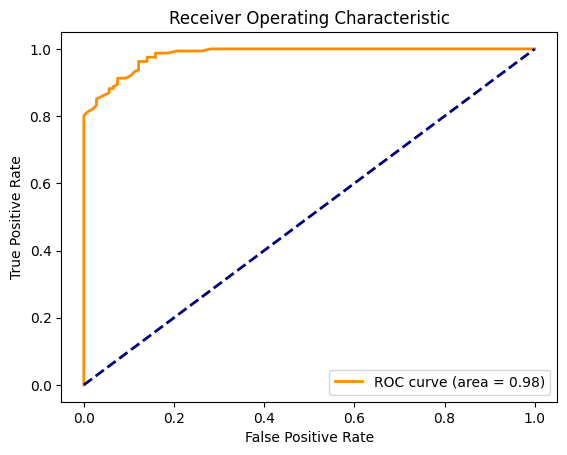

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_prob are already defined
# Example for binary classification, where y_prob is the predicted probabilities
# y_prob = model.predict_proba(X_test)[:, 1]  # for binary classification, get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# For Jupyter notebook users
%matplotlib inline  

# Or for other environments (e.g., Python script):
plt.show(block=True)  # Keeps the plot open


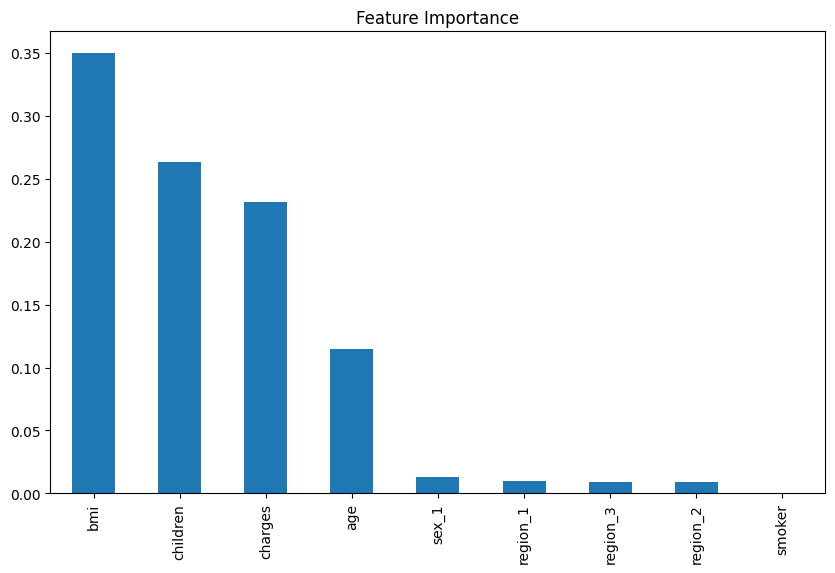

In [11]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance', figsize=(10, 6))
plt.show()


In [12]:
import joblib

# Save the model
joblib.dump(model,"Predictive Modeling for Policyholder Behavior.ipynb")


['Predictive Modeling for Policyholder Behavior.ipynb']